# Understanding Descriptive Statistics

Import the necessary libraries here:

In [66]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
%matplotlib inline
from random import randint
from IPython.display import display

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
def roll_dice(num_rolls):
    rolls = [random.randint(1, 6) for i in range(num_rolls)]
    return rolls

In [3]:
dice_rolls = roll_dice(10)
df_roll = pd.DataFrame({'Roll': range(1, 11), 'Result': dice_rolls})
df_roll

,Roll,Result
0,1,3
1,2,5
2,3,2
3,4,1
4,5,1
5,6,6
6,7,3
7,8,2
8,9,5
9,10,4


#### 2.- Plot the results sorted by value.

In [4]:
# your code here
sorted_df = df_roll.sort_values('Result')
sorted_df

,Roll,Result
3,4,1
4,5,1
2,3,2
7,8,2
0,1,3
6,7,3
9,10,4
1,2,5
8,9,5
5,6,6


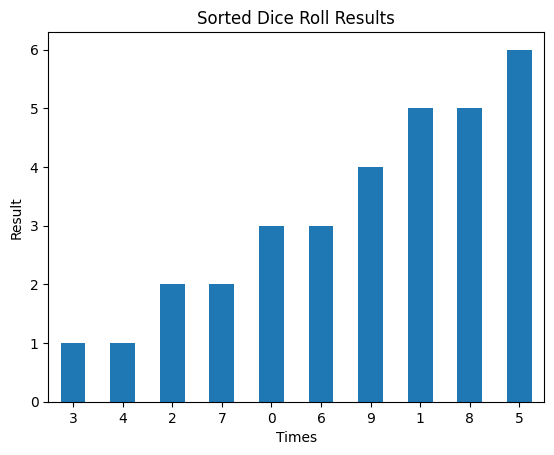

In [5]:
axis = sorted_df['Result'].sort_values().plot.bar(rot=0)
plt.xlabel('Times')
plt.ylabel('Result')
plt.title('Sorted Dice Roll Results')
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

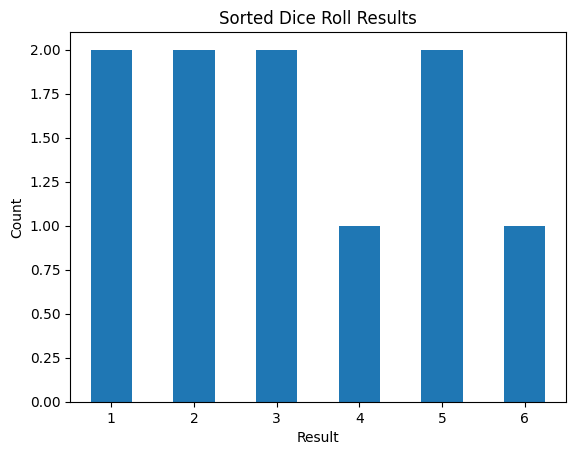

In [6]:
# your code here

axis = sorted_df['Result'].value_counts().sort_index().plot.bar(rot=0)

plt.xlabel('Result')
plt.ylabel('Count')
plt.title('Sorted Dice Roll Results')
plt.show()

In [7]:
"""
your comments here
"""

'\nyour comments here\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
dice_rolls.sort()
dice_rolls

[1, 1, 2, 2, 3, 3, 4, 5, 5, 6]

In [9]:
def media(lista):
    return float(sum(lista)/len(lista))

In [10]:
media(dice_rolls)


3.2

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [27]:
# your code here
frecuencia = pd.Series(dice_rolls).value_counts()
frecuencia


1    2
2    2
3    2
5    2
4    1
6    1
Name: count, dtype: int64

In [41]:
media_frecuencia = media(frecuencia.tolist())
type(media_frecuencia)

float

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [38]:
# your code here
def mediana (lista):
    longitud = len(lista)
    lista.sort()
    if longitud % 2 == 0:
        mediana_1 = lista[longitud//2]
        mediana_2 = lista[longitud//2 - 1]
        mediana_par = (mediana_1 + mediana_2) / 2
        return(float(mediana_par))
    else:
        mediana_impar = lista[longitud//2]
        return(float(mediana_impar))


In [39]:
#Cálculo 1
mediana_calc1= mediana(dice_rolls)
mediana_calc1

3.0

In [46]:
new_list = [5,4,2,]

In [48]:
#Cálculo 2
mediana_calc2 = mediana(new_list)
mediana_calc2

4.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [52]:
# your code here
def quartiles(lista):
    lista.sort()
    longitud = len(lista)
    q1_index = int(longitud * 0.25)
    q2_index = int(longitud * 0.5)
    q3_index = int(longitud * 0.75)

    q1 = lista[q1_index]
    q2 = mediana(lista)  # Utilizamos la función mediana que ya hemos definido para el segundo cuartil.
    q3 = lista[q3_index]

    return q1, q2, q3

In [53]:
q1, q2, q3 = quartiles(dice_rolls)
print("Primer cuartil (Q1):", q1)
print("Segundo cuartil (Q2, mediana):", q2)
print("Tercer cuartil (Q3):", q3)

Primer cuartil (Q1): 2
Segundo cuartil (Q2, mediana): 3.0
Tercer cuartil (Q3): 5


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [54]:
# your code here
roll_dice_hundred = pd.read_csv('../data/roll_the_dice_hundred.csv') 
roll_dice_hundred

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
...,...,...,...
95,95,95,4
96,96,96,6
97,97,97,1
98,98,98,3


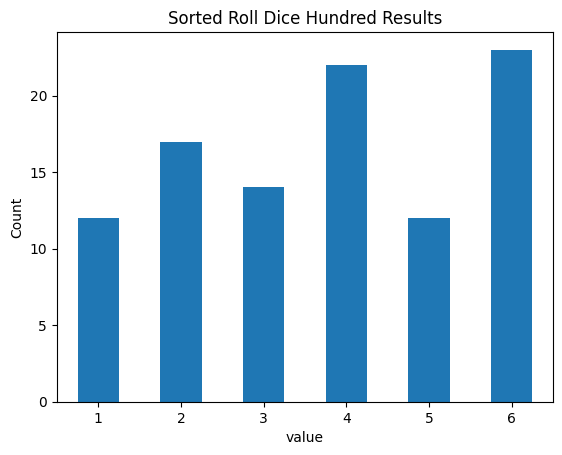

In [55]:
axis = roll_dice_hundred['value'].value_counts().sort_index().plot.bar(rot=0)

plt.xlabel('value')
plt.ylabel('Count')
plt.title('Sorted Roll Dice Hundred Results')
plt.show()

In [ ]:
"""
your comments here
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [60]:
# your code here
roll_hundred_df = roll_dice_hundred['value'].sort_values()
roll_hundred_df

0     1
47    1
56    1
9     1
73    1
     ..
17    6
11    6
24    6
21    6
99    6
Name: value, Length: 100, dtype: int64

In [61]:
media(roll_hundred_df)

3.74

#### 3.- Now, calculate the frequency distribution.


In [62]:
# your code here
frecuencia2 = pd.Series(roll_hundred_df).value_counts()
frecuencia2

value
6    23
4    22
2    17
3    14
1    12
5    12
Name: count, dtype: int64

In [64]:
media_frecuencia2 = media(frecuencia2.tolist())
media_frecuencia2

16.666666666666668

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

(0.0, 100.0)

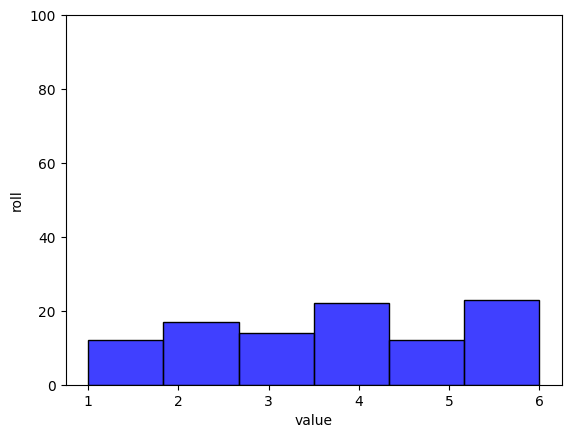

In [72]:
# your code here
sns.histplot(x = "value", bins = 6, data = roll_dice_hundred, color = 'blue')
plt.ylabel("roll")
plt.ylim(0, 100) 

In [73]:
"""
Es un histograma simétrico"""

'\nEs un histograma simétrico'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [74]:
# your code here
roll_dice_thousand = pd.read_csv('../data/roll_the_dice_thousand.csv') 
roll_dice_thousand

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5
...,...,...,...
995,995,995,1
996,996,996,4
997,997,997,4
998,998,998,3


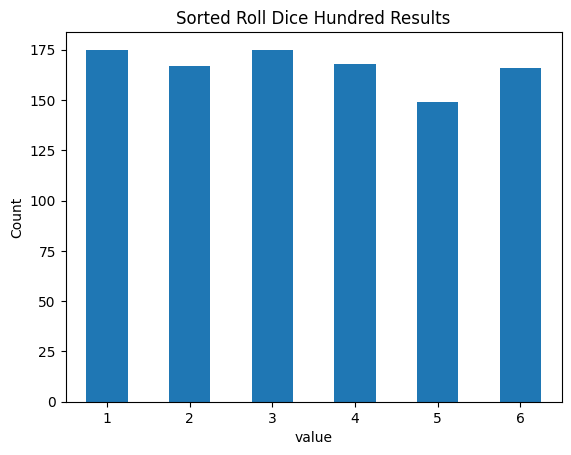

In [75]:
axis = roll_dice_thousand['value'].value_counts().sort_index().plot.bar(rot=0)

plt.xlabel('value')
plt.ylabel('Count')
plt.title('Sorted Roll Dice Hundred Results')
plt.show()

In [76]:
#La frecuencia de cada valor es mayor dado que se han tirado más veces.

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [77]:
# your code here
ages_population = pd.read_csv('../data/ages_population.csv') 
ages_population

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


In [81]:
frecuencia3 =ages_population['observation'].value_counts()
frecuencia3

observation
39.0    45
41.0    36
30.0    34
35.0    33
43.0    32
        ..
73.0     1
82.0     1
70.0     1
71.0     1
69.0     1
Name: count, Length: 72, dtype: int64

<Axes: xlabel='observation', ylabel='Count'>

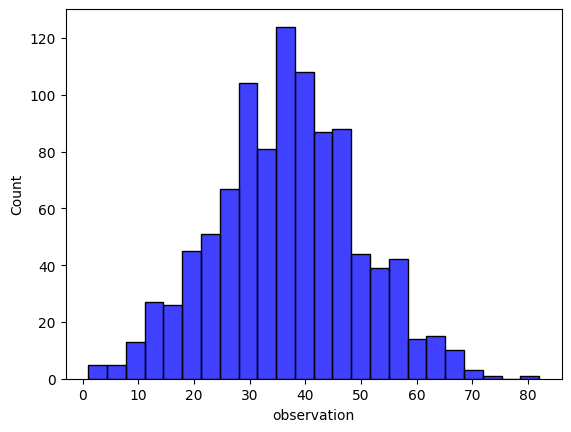

In [83]:
sns.histplot(x = "observation", data = ages_population, color = 'blue')


In [86]:
#El rango de la media se sitúa en 36.

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [87]:
media4= ages_population['observation'].mean()
media4

36.56

In [88]:
desviacion4= ages_population['observation'].std()
desviacion4

12.81649962597677

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [89]:
ages_population_2 = pd.read_csv('../data/ages_population2.csv') 
ages_population_2

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0
...,...
995,26.0
996,22.0
997,21.0
998,19.0


In [90]:
frecuencia4 =ages_population_2['observation'].value_counts()
frecuencia4

observation
28.0    139
27.0    125
26.0    120
29.0    115
25.0     98
30.0     90
24.0     78
31.0     61
23.0     41
22.0     35
32.0     31
33.0     22
21.0     17
20.0     13
34.0      7
19.0      3
35.0      3
36.0      2
Name: count, dtype: int64

<Axes: xlabel='observation', ylabel='Count'>

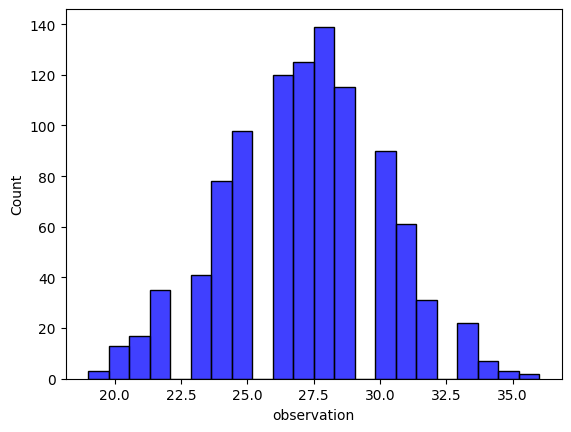

In [92]:
sns.histplot(x = "observation", data = ages_population_2, color = 'blue')


####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [93]:
"""
si, el rango es menor y se ve toda la información con mayor detalle.
"""

'\nsi, el rango es menor y se ve toda la información con mayor detalle.\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [94]:
media5= ages_population_2['observation'].mean()
media5

27.155

In [95]:
desviacion5= ages_population_2['observation'].std()
desviacion5

2.9698139326891835

In [96]:
"""
Que como se indicaba en el caso anterior, el rango es menor en este caso
"""

'\nQue como se indicaba en el caso anterior, el rango es menor en este caso\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [97]:
# your code here
ages_population_3 = pd.read_csv('../data/ages_population3.csv') 
ages_population_3

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0
...,...
995,16.0
996,55.0
997,30.0
998,35.0


In [98]:
frecuencia5 =ages_population_3['observation'].value_counts()
frecuencia5

observation
32.0    37
35.0    31
37.0    31
39.0    29
36.0    26
        ..
76.0     1
8.0      1
9.0      1
1.0      1
7.0      1
Name: count, Length: 75, dtype: int64

<Axes: xlabel='observation', ylabel='Count'>

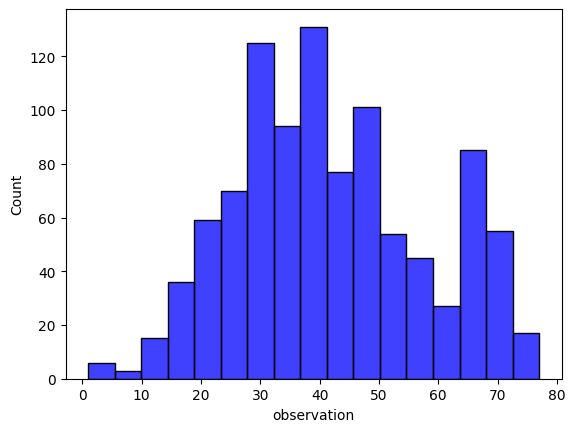

In [100]:
sns.histplot(x = "observation", data = ages_population_3, color = 'blue')


#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [103]:
# your code here
media6= ages_population_3['observation'].mean()
media6

41.989

In [104]:
desviacion6= ages_population_3['observation'].std()
desviacion6

16.14470595986593

In [105]:
#tanto la media como la desviación estándar son mayores

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [111]:
values_3= list(ages_population_3['observation'])
values_3

[21.0,
 21.0,
 24.0,
 31.0,
 54.0,
 52.0,
 37.0,
 69.0,
 36.0,
 30.0,
 64.0,
 30.0,
 76.0,
 73.0,
 42.0,
 52.0,
 67.0,
 28.0,
 24.0,
 50.0,
 70.0,
 57.0,
 20.0,
 27.0,
 51.0,
 67.0,
 56.0,
 30.0,
 52.0,
 44.0,
 49.0,
 31.0,
 64.0,
 65.0,
 32.0,
 37.0,
 37.0,
 18.0,
 65.0,
 42.0,
 45.0,
 40.0,
 66.0,
 72.0,
 43.0,
 64.0,
 43.0,
 54.0,
 48.0,
 30.0,
 35.0,
 41.0,
 17.0,
 44.0,
 32.0,
 37.0,
 45.0,
 41.0,
 23.0,
 45.0,
 69.0,
 36.0,
 47.0,
 31.0,
 33.0,
 51.0,
 27.0,
 20.0,
 15.0,
 26.0,
 28.0,
 67.0,
 36.0,
 54.0,
 17.0,
 51.0,
 75.0,
 41.0,
 29.0,
 55.0,
 37.0,
 63.0,
 42.0,
 49.0,
 32.0,
 39.0,
 46.0,
 50.0,
 32.0,
 43.0,
 45.0,
 26.0,
 22.0,
 15.0,
 26.0,
 24.0,
 71.0,
 55.0,
 68.0,
 35.0,
 40.0,
 55.0,
 21.0,
 60.0,
 41.0,
 22.0,
 34.0,
 30.0,
 56.0,
 61.0,
 51.0,
 33.0,
 47.0,
 48.0,
 26.0,
 30.0,
 56.0,
 42.0,
 66.0,
 50.0,
 57.0,
 12.0,
 20.0,
 69.0,
 47.0,
 38.0,
 68.0,
 41.0,
 33.0,
 29.0,
 63.0,
 38.0,
 55.0,
 39.0,
 44.0,
 74.0,
 40.0,
 35.0,
 49.0,
 37.0,
 34.0,
 25.0,
 15.0,

In [112]:
# your code here
q1, q2, q3 = quartiles(values_3)
print("Primer cuartil (Q1):", q1)
print("Segundo cuartil (Q2, mediana):", q2)
print("Tercer cuartil (Q3):", q3)

Primer cuartil (Q1): 30.0
Segundo cuartil (Q2, mediana): 40.0
Tercer cuartil (Q3): 53.0


In [117]:
values= list(ages_population['observation'])
values

[68.0,
 12.0,
 45.0,
 38.0,
 49.0,
 27.0,
 39.0,
 12.0,
 42.0,
 33.0,
 30.0,
 25.0,
 30.0,
 44.0,
 53.0,
 46.0,
 50.0,
 22.0,
 6.0,
 29.0,
 29.0,
 27.0,
 35.0,
 38.0,
 28.0,
 26.0,
 60.0,
 41.0,
 38.0,
 41.0,
 44.0,
 52.0,
 46.0,
 39.0,
 44.0,
 46.0,
 32.0,
 23.0,
 15.0,
 40.0,
 42.0,
 32.0,
 45.0,
 29.0,
 22.0,
 41.0,
 39.0,
 63.0,
 39.0,
 31.0,
 34.0,
 28.0,
 45.0,
 33.0,
 32.0,
 61.0,
 64.0,
 37.0,
 56.0,
 44.0,
 33.0,
 38.0,
 40.0,
 38.0,
 56.0,
 14.0,
 52.0,
 34.0,
 14.0,
 34.0,
 31.0,
 46.0,
 50.0,
 37.0,
 13.0,
 12.0,
 25.0,
 28.0,
 51.0,
 13.0,
 36.0,
 52.0,
 13.0,
 30.0,
 36.0,
 35.0,
 26.0,
 34.0,
 51.0,
 52.0,
 35.0,
 44.0,
 23.0,
 29.0,
 25.0,
 30.0,
 27.0,
 42.0,
 18.0,
 39.0,
 42.0,
 48.0,
 30.0,
 40.0,
 34.0,
 28.0,
 48.0,
 48.0,
 42.0,
 53.0,
 34.0,
 37.0,
 32.0,
 29.0,
 18.0,
 35.0,
 58.0,
 37.0,
 32.0,
 49.0,
 20.0,
 42.0,
 29.0,
 22.0,
 39.0,
 41.0,
 54.0,
 20.0,
 19.0,
 39.0,
 39.0,
 39.0,
 58.0,
 23.0,
 45.0,
 13.0,
 44.0,
 39.0,
 30.0,
 37.0,
 62.0,
 45.0,
 33.0,


In [118]:
q1, q2, q3 = quartiles(values)
print("Primer cuartil (Q1):", q1)
print("Segundo cuartil (Q2, mediana):", q2)
print("Tercer cuartil (Q3):", q3)

Primer cuartil (Q1): 28.0
Segundo cuartil (Q2, mediana): 37.0
Tercer cuartil (Q3): 45.0


In [119]:
# si comparamos los resultados de ages_population y ages_population_3,
#el rango es mucho menor en el primer dataset lo que explica los resultados.

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [116]:
print(ages_population['observation'].quantile([0.1,0.5,0.9]))


0.1    20.0
0.5    37.0
0.9    53.0
Name: observation, dtype: float64


In [113]:
# your code here
print(ages_population_3['observation'].quantile([0.1,0.5,0.9]))


0.1    22.0
0.5    40.0
0.9    67.0
Name: observation, dtype: float64


In [120]:
"""
Ocurre lo mismo que en el caso anterior"""

'\nOcurre lo mismo que en el caso anterior'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [121]:
# your code here
ages_population.describe()


,observation
count,1000.0000
mean,36.5600
std,12.8165
min,1.0000
25%,28.0000
50%,37.0000
75%,45.0000
max,82.0000


In [122]:
ages_population_2.describe()


,observation
count,1000.000000
mean,27.155000
std,2.969814
min,19.000000
25%,25.000000
50%,27.000000
75%,29.000000
max,36.000000


In [123]:
ages_population_3.describe()


,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [124]:
"""
Todos los dataset tienen una muestra de 1000. 
La media de edad mayor es en el tercer data set. y la menor en el segundo.
La edad mínima coinciden en el primer y tercer dataset, mientras que incrementa en el segundo.
La edad máxima está en el primer data set.
Aquí se observa muy bien que el rango es mucho menor en el segundo"""

'\nTodos los dataset tienen una muestra de 1000. \nLa media de edad mayor es en el tercer data set. y la menor en el segundo.\nLa edad mínima coinciden en el primer y tercer dataset, mientras que incrementa en el segundo.\nLa edad máxima está en el primer data set.\nAquí se observa muy bien que el rango es mucho menor en el segundo'